In [1]:
import pyxtf
import numpy as np
import matplotlib.pyplot as plt
from typing import List

%matplotlib inline

In [2]:
# Read the test file
# Note that at this point, the header_7125 and header_7125_snippet is not implemented, which is why a warning is shown
# The bathymetry and sonar headers are implemented, however - which can be read while ignoring the unimplemented packets
test_file = r'C:\dev\pyxtf\data\DemoFiles\Isis_Sonar_XTF\Reson7125.XTF'
(fh, p) = pyxtf.xtf_read(test_file, verbose=True)

XTF Channels: sonar=2, bathy=1, snippet=1, forward=0, echo=0, interferometry=0


C:\dev\pyxtf\pyxtf\xtf_io.py:165: UserWarning: Unsupported packet type 'XTFHeaderType.header_7125_snippet' encountered
  warnings.warn(warning_str)
C:\dev\pyxtf\pyxtf\xtf_io.py:165: UserWarning: Unsupported packet type 'XTFHeaderType.header_7125' encountered
  warnings.warn(warning_str)


In [3]:
# Print the file-header (prints all the ctypes fields)
print(fh)

FileFormat: 123
SystemType: 1
RecordingProgramName: b'Isis'
RecordingProgramVersion: b'7.1.42'
SonarName: b'Reson7125.exe'
SonarType: 46
NoteString: b'Reson 7125'
ThisFileName: b'C:\\TEMP\\XTF\\TESTTRITON1.XTF'
NavUnits: 3
NumberOfSonarChannels: 2
NumberOfBathymetryChannels: 1
NumberOfSnippetChannels: 1
NumberOfForwardLookArrays: 0
NumberOfEchoStrengthChannels: 0
NumberOfInterferometryChannels: 0
Reserved1: 0
Reserved2: 0
ReferencePointHeight: 0.0
ProjectionType: [204, 204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SpheriodType: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
NavigationLatency: 0
OriginY: 0.0
OriginX: 0.0
NavOffsetY: 0.0
NavOffsetX: 0.0
NavOffsetZ: 0.0
NavOffsetYaw: 0.0
MRUOffsetY: 0.0
MRUOffsetX: 0.0
MRUOffsetZ: 0.0
MRUOffsetYaw: 0.0
MRUOffsetPitch: 0.0
MRUOffsetRoll: 0.0
ChanInfo: [<pyxtf.xtf_ctypes.XTFChanInfo object at 0x0000014387621848>, <pyxtf.xtf_ctypes.XTFChanInfo object at 0x0000014387621AC8>, <pyxtf.xtf_ctypes.XTFChanInfo object at 0x0000014387621948>, <pyxtf.xtf_ctypes.XTFChanInfo obje

In [4]:
# The ChanInfo field is an array of XTFChanInfo objects
# Note that the ChanInfo field always has a size of 6, even if the number of channels is less. 
# Use the fh.NumXChannels fields to calculate the number (the function xtf_channel_count does this)
n_channels = pyxtf.channel_count(fh)
actual_chan_info = [fh.ChanInfo[i] for i in range(0, n_channels)]
print('Number of data channels: {}\n'.format(n_channels))

# Print the first channel
print(actual_chan_info[0])

Number of data channels: 4

TypeOfChannel: 1
SubChannelNumber: 0
CorrectionFlags: 1
UniPolar: 0
BytesPerSample: 2
Reserved: 512
ChannelName: b'PORT SB1'
VoltScale: 2.5
Frequency: 400.0
HorizBeamAngle: 15.0
TiltAngle: 0.0
BeamWidth: 90.0
OffsetX: 0.0
OffsetY: 0.0
OffsetZ: 0.0
OffsetYaw: 0.0
OffsetPitch: 0.0
OffsetRoll: 0.0
BeamsPerArray: 0
ReservedArea2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



In [5]:
# Print the keys in the packets-dictionary
print([key for key in p])

[<XTFHeaderType.attitude: 3>, <XTFHeaderType.sonar: 0>, <XTFHeaderType.pos_raw_navigation: 107>]


In [6]:
# Retrieve the sonar channels, which is a list of pings
sonar_ch = p[pyxtf.XTFHeaderType.sonar]  # type: List[pyxtf.XTFPingHeader]

# Each element in the list is a ping (XTFPingHeader)
sonar_ch_ping1 = sonar_ch[0]

# The properties in the header defines the attributes common for all subchannels
print(sonar_ch_ping1)

MagicNumber: 64206
HeaderType: 0
SubChannelNumber: 0
NumChansToFollow: 2
Reserved1: [0, 0]
NumBytesThisRecord: 3200
Year: 2006
Month: 11
Day: 1
Hour: 4
Minute: 34
Second: 40
HSeconds: 15
JulianDay: 305
EventNumber: 0
PingNumber: 396034
SoundVelocity: 750.0
OceanTide: 0.0
Reserved2: 0
ConductivityFreq: 0.0
TemperatureFreq: 0.0
PressureFreq: 0.0
PressureTemp: 0.0
Conductivity: 0.0
WaterTemperature: 0.0
Pressure: 0.0
ComputedSoundVelocity: 0.0
MagX: 0.0
MagY: 0.0
MagZ: 0.0
AuxVal1: 6.115478992462158
AuxVal2: 0.0
AuxVal3: 0.0
AuxVal4: 0.0
AuxVal5: 0.0
AuxVal6: 0.0
SpeedLog: 0.0
Turbidity: 0.0
ShipSpeed: 7.364889144897461
ShipGyro: 190.2081298828125
ShipYcoordinate: 0.0
ShipXcoordinate: 0.0
ShipAltitude: 0
ShipDepth: 0
FixTimeHour: 4
FixTimeMinute: 34
FixTimeSecond: 40
FixTimeHsecond: 25
SensorSpeed: 7.364889144897461
KP: 0.0
SensorYcoordinate: 37.49592938422553
SensorXcoordinate: -122.48607010940432
SonarStatus: 0
RangeToFish: 0
BearingToFish: 0
CableOut: 0
Layback: 0.0
CableTension: 0.0
S

In [7]:
# The data and header for each subchannel is contained in the data and ping_chan_headers respectively.
# The data is a list of numpy arrays (one for each subchannel)
sonar_subchan0 = sonar_ch_ping1.data[0]  # type: np.ndarray
sonar_subchan1 = sonar_ch_ping1.data[1]  # type: np.ndarray

print(sonar_subchan0.shape)
print(sonar_subchan1.shape)

(690,)
(690,)


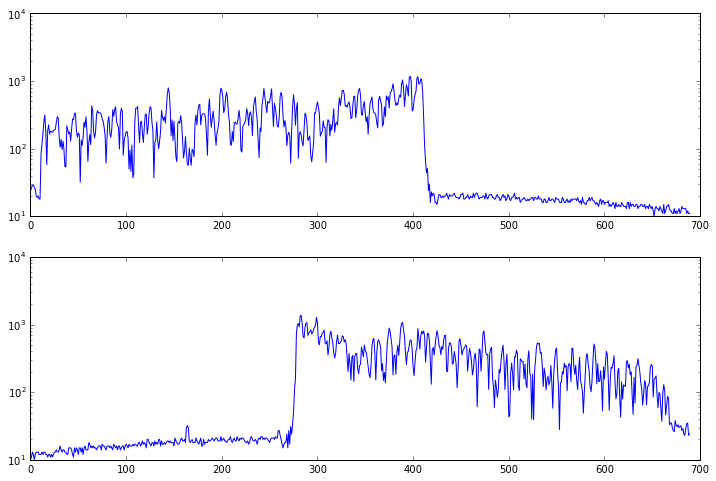

In [8]:
# The following plots a signal-view of the first ping (in the file)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
ax1.semilogy(np.arange(0, sonar_subchan0.shape[0]), sonar_subchan0)
ax2.semilogy(np.arange(0, sonar_subchan1.shape[0]), sonar_subchan1)

In [9]:
# The ping_chan_info contains information specific to this subchannel (e.g specific to the port-sonar or stbd-sonar).
sonar_ping1_ch_header0 = sonar_ch_ping1.ping_chan_headers[0]
print(sonar_ping1_ch_header0)

ChannelNumber: 0
DownsampleMethod: 2
SlandRange: 15.007499694824219
GroundRange: 0.0
TimeDelay: 0.0
TimeDuration: 0.020010000094771385
SecondsPerPing: 0.0
ProcessingFlags: 0
Frequency: 396
InitialGainCode: 0
GainCode: 0
BandWidth: 0
ContactNumber: 0
ContactClassification: 0
ContactSubNumber: 0
ContactType: 0
NumSamples: 690
MillivoltScale: 0
ContactTimeOffTrack: 0.0
ContactCloseNumber: 0
Reserved2: 0
FixedVSOP: 0.0
Weight: 0
ReservedSpace: [0, 0, 0, 0]



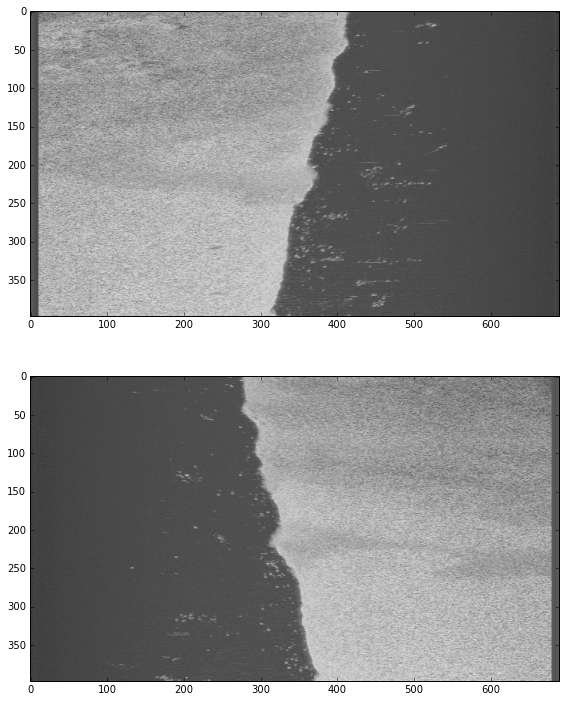

In [10]:
# The function concatenate_channels concatenates all the individual pings for a channel, and returns it as a dense numpy array
np_chan1 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], fh.ChanInfo, channel=0)
np_chan2 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], fh.ChanInfo, channel=1)

# Clip to range (max cannot be used due to outliers)
# More robust methods are possible (through histograms / statistical outlier removal)
upper_limit = 2 ** 14
np_chan1.clip(0, upper_limit-1, out=np_chan1)
np_chan2.clip(0, upper_limit-1, out=np_chan2)

# The sonar data is logarithmic (dB), add small value to avoid log10(0)
np_chan1 = np.log10(np_chan1 + 0.0001)
np_chan2 = np.log10(np_chan2 + 0.0001)

# Transpose so that the largest axis is horizontal
np_chan1 = np_chan1 if np_chan1.shape[0] < np_chan1.shape[1] else np_chan1.T
np_chan2 = np_chan2 if np_chan2.shape[0] < np_chan2.shape[1] else np_chan2.T

# The following plots the waterfall-view in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.imshow(np_chan1, cmap='gray', vmin=0, vmax=np.log10(upper_limit))
ax2.imshow(np_chan2, cmap='gray', vmin=0, vmax=np.log10(upper_limit))